In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Wstępna analiza danych

In [36]:
# wczytujemy dane z pliku csv
# zazwyczaj separatorem jest ",", ale w tym przypadku jest to ";"
df = pd.read_csv('data.csv', sep=';')
# wyświetl pierwsze n wierszy
df.head(5)

,Rozmiar,Kolor,Dostępny w internecie,Cena,Sprzedane sztuki
0,S,Różowy,Tak,20,120
1,M,Czerwony,Tak,11,110
2,S,Czarny,Nie,15,50
3,XL,Czerwony,Nie,22,60
4,L,Różowy,Tak,16,100


In [37]:
# wyświetl nazwy kolumn
print(df.columns)

Index(['Rozmiar', 'Kolor', 'Dostępny w internecie', 'Cena',
       'Sprzedane sztuki'],
      dtype='object')


In [38]:
# wyświetl informacje o danych
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rozmiar                12 non-null     object
 1   Kolor                  12 non-null     object
 2   Dostępny w internecie  12 non-null     object
 3   Cena                   12 non-null     int64 
 4   Sprzedane sztuki       12 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 608.0+ bytes


In [39]:
# funkcja describe pokazuje dane statystyczne o datasecie (dla cech, dla których jest to możliwe)
df.describe()

,Cena,Sprzedane sztuki
count,12.000000,12.000000
mean,17.000000,70.833333
std,3.275252,42.567237
min,11.000000,10.000000
25%,15.000000,41.000000
50%,16.500000,74.000000
75%,20.000000,102.500000
max,22.000000,130.000000


# Brakujące dane

In [40]:
# wczytujemy dataset
data = pd.read_csv('missing_data.csv').iloc[:, 1:]
data.head(5)

,Name,Pclass,Cabin,Age
0,"Braund, Mr. Owen Harris",3,NaN,22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,C85,38.0
2,"Heikkinen, Miss. Laina",3,NaN,26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,C123,35.0
4,"Allen, Mr. William Henry",3,NaN,35.0


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    891 non-null    object 
 1   Pclass  891 non-null    int64  
 2   Cabin   204 non-null    object 
 3   Age     714 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 28.0+ KB


In [42]:
# liczymy ile danych nam brakuje
data.isna().sum()

Name        0
Pclass      0
Cabin     687
Age       177
dtype: int64

In [43]:
# w przypadku, kiedy brakujących danych jest sporo, możemy je po prostu usunąć 
data = data.drop(['Cabin'], axis=1)
data

,Name,Pclass,Age
0,"Braund, Mr. Owen Harris",3,22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0
2,"Heikkinen, Miss. Laina",3,26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0
4,"Allen, Mr. William Henry",3,35.0
...,...,...,...
886,"Montvila, Rev. Juozas",2,27.0
887,"Graham, Miss. Margaret Edith",1,19.0
888,"Johnston, Miss. Catherine Helen ""Carrie""",3,NaN
889,"Behr, Mr. Karl Howell",1,26.0


In [44]:
# w przypadku, gdy brakujących danych jest niewiele, możemy je zastąpić
data['Age'] = data['Age'].fillna(value=np.mean(data['Age']))

In [45]:
data.isna().sum()

Name      0
Pclass    0
Age       0
dtype: int64

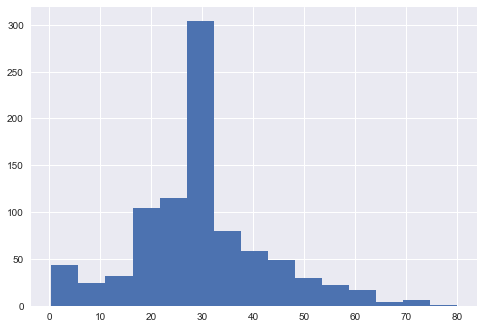

In [46]:
plt.hist(data['Age'], bins=15)
plt.show()

# Mapowanie cech porządkowych

In [47]:
# wracamy do datasetu dotyczącego ubrań
df.head()

,Rozmiar,Kolor,Dostępny w internecie,Cena,Sprzedane sztuki
0,S,Różowy,Tak,20,120
1,M,Czerwony,Tak,11,110
2,S,Czarny,Nie,15,50
3,XL,Czerwony,Nie,22,60
4,L,Różowy,Tak,16,100


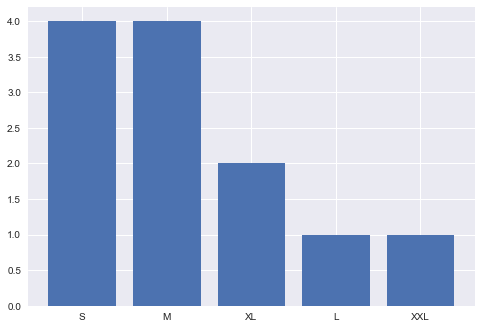

In [48]:
# wykres częstości dla rozmiarów
plt.bar(df['Rozmiar'].unique(), df['Rozmiar'].value_counts())
plt.show()

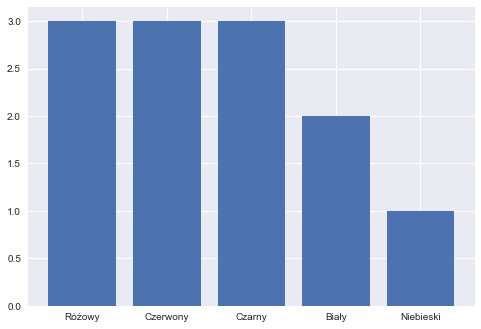

In [49]:
# wykres częstości dla kolorów
plt.bar(df['Kolor'].unique(), df['Kolor'].value_counts())
plt.show()

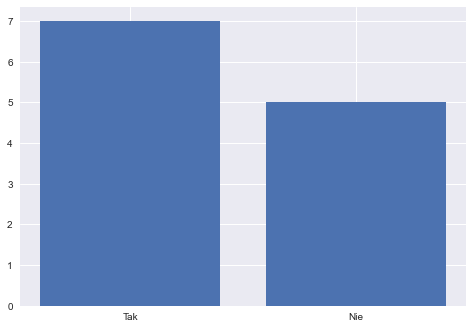

In [50]:
# wykres częstości dla dostępności w internecie
plt.bar(df['Dostępny w internecie'].unique(), df['Dostępny w internecie'].value_counts())
plt.show()

## Mapowanie rozmiaru

In [51]:
df['Rozmiar'].unique()

array(['S', 'M', 'XL', 'L', 'XXL'], dtype=object)

In [52]:
# jest to cecha kategoryczna, ale porządkowa (rozmiar L jest większy niż rozmiar S)
map_ = {
    'S': 0,
    'M': 1,
    'L': 2,
    'XL': 3,
    'XXL': 4
}
# uwaga, powinno się zmapować wszystkie możliwe rozmiary, ale mi się nie chciało
df['Rozmiar'] = df['Rozmiar'].map(map_)
df.head(5)

,Rozmiar,Kolor,Dostępny w internecie,Cena,Sprzedane sztuki
0,0,Różowy,Tak,20,120
1,1,Czerwony,Tak,11,110
2,0,Czarny,Nie,15,50
3,3,Czerwony,Nie,22,60
4,2,Różowy,Tak,16,100


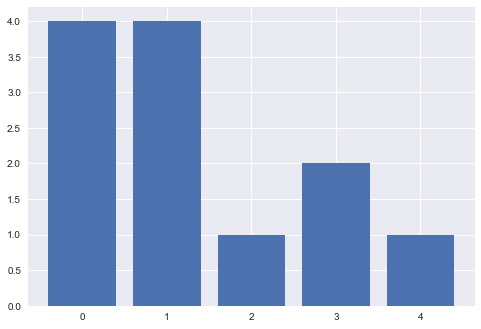

In [53]:
plt.bar(df['Rozmiar'].unique(), df['Rozmiar'].value_counts())
plt.show()

# One-Hot Encoding

In [54]:
# dane kategoryczne nominalne trzeba mapować używając one-hot encodingu
# użyjemy do tego funkcji: get dummies

In [55]:
# opuszczamy pierwszą kolumnę, ponieważ nie jest nam potrzebna
df = pd.get_dummies(df, columns=['Kolor', 'Dostępny w internecie'], drop_first=True)
df.head(5)

,Rozmiar,Cena,Sprzedane sztuki,Kolor_Czarny,Kolor_Czerwony,Kolor_Niebieski,Kolor_Różowy,Dostępny w internecie_Tak
0,0,20,120,0,0,0,1,1
1,1,11,110,0,1,0,0,1
2,0,15,50,1,0,0,0,0
3,3,22,60,0,1,0,0,0
4,2,16,100,0,0,0,1,1


# Skalowanie danych

In [56]:
# większość modeli będzie potrzebować jakieś formy skalowania danych, przykładem może być standaryzacja,
# którą stosowaliśmy już na poprzedniej lekcji
def scale_data(data):
    std = data.std()
    mean = data.mean()
    return (data - mean) / std

In [57]:
# nie wszystko należy skalować, w naszym przypadku będzie to np. cena i sprzedane sztuki
columns = ['Cena', 'Sprzedane sztuki']
for col in columns:
    df[col] = scale_data(df[col])

In [58]:
# możemy zobaczyć, że w istocie odchylenie standardowe jest równe 1, a średnia bardzo bliska 0
print(f'Średnia: {df["Cena"].mean()}')
print(f'Odchylenie standardowe: {df["Cena"].std()}')

Średnia: 1.850371707708594e-17
Odchylenie standardowe: 1.0


In [59]:
df.head()

,Rozmiar,Cena,Sprzedane sztuki,Kolor_Czarny,Kolor_Czerwony,Kolor_Niebieski,Kolor_Różowy,Dostępny w internecie_Tak
0,0,0.91596,1.155035,0,0,0,1,1
1,1,-1.83192,0.920113,0,1,0,0,1
2,0,-0.61064,-0.489422,1,0,0,0,0
3,3,1.52660,-0.254499,0,1,0,0,0
4,2,-0.30532,0.685191,0,0,0,1,1
